<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-doenca-pulmonar-com-RNA/blob/main/Prevendo_doen%C3%A7a_pulmonar_co_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>**Prevendo doença pulmonar com RNA (rede neural artificial)**</font>

---



**Redes Convulocionais**

Uma `Rede Neural Convulacional (ConvNet)`, é um algoritmo de _aprendizado profundo_ (Deep Learning) que pode captar uma imagem de entrada e atribuir importâncias como pesos e vieses  a vários aspectos e objetos da imagem e, assim ser capaz de diferenciar umas das outras.



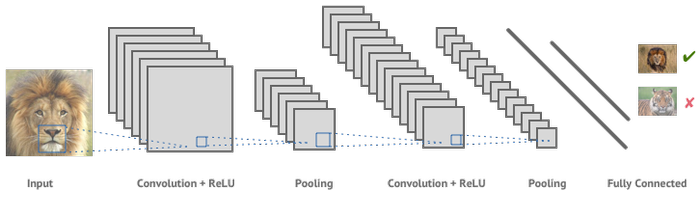

- **Material extra:**

  - Rede neural convolucional
    - https://bit.ly/3AE322Z

  - Capítulo 40 – Introdução as Redes Neurais Convolucionais
    - https://bit.ly/3o4r6J1

  - Tópico 10 - Redes Neurais Convolucionais - Deep Learning
    - https://bit.ly/3i0Upsg

  - Uma introdução as redes neurais convolucionais utilizando o Keras
    - https://bit.ly/2ZuXomf

  - As Redes Neurais Convolucionais no Deep Learning
    - https://bit.ly/3i0qO1N

  - Introdução às redes neurais convolucionais (ML de Zero a 100, parte 3)
    - https://www.youtube.com/watch?v=zAfBy74c2AI

Para nossa atividade prática, irei utilizar um conjunto de imagens do [`Kaggle`](https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset).

**Agora vamos pra prática!!!**

## **Importando as bibliotecas e o conjunto de dados**

In [1]:
# importando as bibliotecas e módulos necessários

import pandas as pd                 # para modelagem/tratamento dos dados
import numpy as np                  # para recursos matemáticos
import matplotlib.pyplot as plt     # para visualização gráfica
import seaborn as sns               # para visualização gráfica
import matplotlib.pyplot as mpimg   # para carregar iamgens pelo Matplotlib
import PIL.Image                    # para manipular imagens
import os                           # para acessar recursos do sistema operacional
import tensorflow as tf             # para utlizar as funções do TensorFlow

%matplotlib inline

# módulos (funções) do TensorFlow

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50


# para carregar imagem pelo Keras
from tensorflow.keras.preprocessing import image as Image_

# para extrair os recursos de escala das cores
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array


from tqdm import tqdm               # para verificar o progresso do loop


# para ignorar alertas de erro
import warnings
warnings.filterwarnings('ignore')                                                                                                                

In [2]:
# importando o dados para o ambiente do google colab
from google.colab import files
uploaded = files.upload()

Saving Chest_xray_Corona_Metadata.csv to Chest_xray_Corona_Metadata.csv


In [2]:
# instanciando os dados na variável "data"
data = pd.read_csv('/content/Chest_xray_Corona_Metadata.csv')

## **Análise exploratória e tratamento dos dados**

In [3]:
# visualizando as 5 primeiras linhas do objeto instanciado
data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [4]:
# verificando a dimensão do objeto
data.shape # linhas e colunas

(5910, 6)

In [5]:
# realizando dois "for" para percorrer o objeto - nome das colunas e tipo de dado
for col_name in data.columns:
    print(col_name)
print()
for data_type in data.dtypes:
    print(data_type)

Unnamed: 0
X_ray_image_name
Label
Dataset_type
Label_2_Virus_category
Label_1_Virus_category

int64
object
object
object
object
object


In [6]:
# visualizando instâncias únicas da coluna "Label" e seus respectivos valores
print(data['Label'].unique())
print()
data['Label'].value_counts()

['Normal' 'Pnemonia']



Pnemonia    4334
Normal      1576
Name: Label, dtype: int64

In [7]:
# visualizando instâncias únicas da coluna "Dataset_type" e seus respectivos valores
print(data['Dataset_type'].unique())
print()
data['Dataset_type'].value_counts()

['TRAIN' 'TEST']



TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64

In [8]:
# visualizando instâncias únicas da coluna "Label_1_Virus_category" e seus respectivos valores
print(data['Label_1_Virus_category'].unique())
print()
data['Label_1_Virus_category'].value_counts()

[nan 'Virus' 'bacteria' 'Stress-Smoking']



bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [9]:
# visualizando instâncias únicas da coluna "Label_2_Virus_category" e seus respectivos valores
print(data['Label_2_Virus_category'].unique())
print()
data['Label_2_Virus_category'].value_counts()

[nan 'Streptococcus' 'COVID-19' 'ARDS' 'SARS']



COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

In [10]:
# visualizando novamente se há dados nulos/faltantes no conjunto de dados
data.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

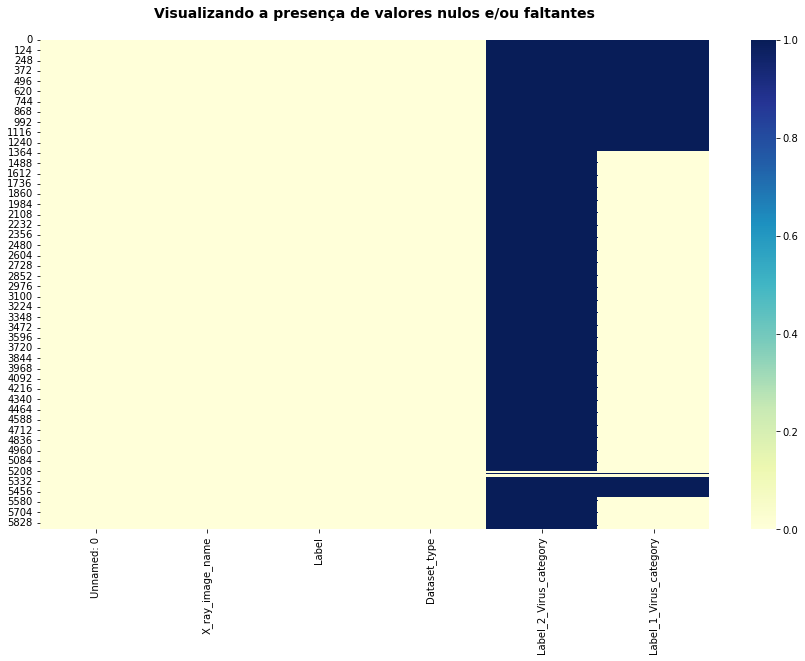

In [11]:
# verificando visualmente se há valores nulos/faltantes
# caso exista, a colunas estará em destaque - início e fim dos intervalos
plt.figure(figsize=(15,9))
plt.title('Visualizando a presença de valores nulos e/ou faltantes\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.heatmap(data.isnull(), 
            cmap='YlGnBu',
            cbar=True);

> Podemos perceber visualmente que as colunas `Label_2_Virus_category` e `Label_1_Virus_category` há valores nulos/faltantes e, principalmente em maior parte na última coluna com início e fim dos intervalos.

Também temos outra biblioteca que nos fornece recurso visual para verificar se há dados nulos/asusentes.

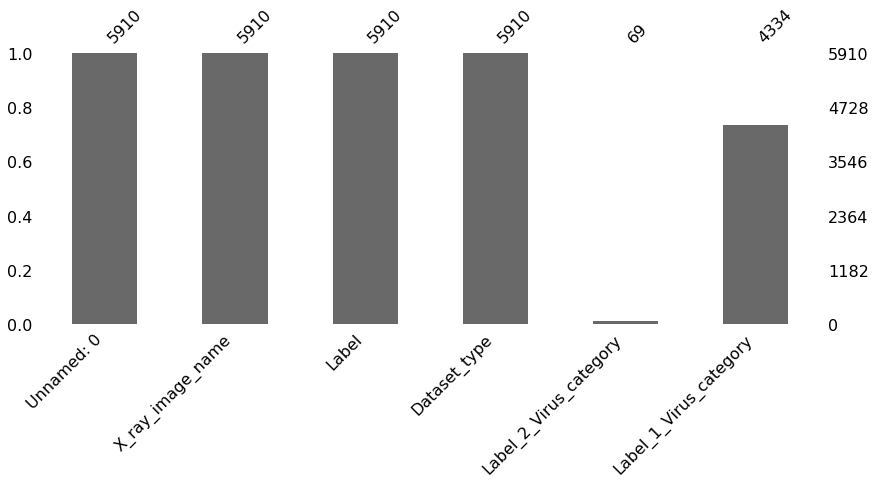

In [12]:
# importando a biblioteca "missingno" para visualizar de forma gráfica valores ausentes
import missingno as msno

# plotando gráfico de barras com a biblioteca "missingno" e juntamente com a função ".bar()"
# onde iremos contabilizar os valores nulos e exibí-los de forma gráfica
msno.bar(data, figsize=(14, 5));

In [13]:
# verificando a frequência relativa de dados ausentes 
# das colunas "Label_1_Virus_category" e "Label_2_Virus_category" Vs o total de dados do conjunto
data.isnull().sum()[-2:] / data.shape[0]

Label_2_Virus_category    0.988325
Label_1_Virus_category    0.266667
dtype: float64

> Perceba que, a coluna `Label_2_Virus_category` possui ~ 99% de dados ausentes e, `Label_1_Virus_category` com ~ 27%.

**Analisando as colunas com a classificação da doença;**

- Label_1_Virus_category
- Label_2_Virus_category

In [14]:
# primeira categória
data['Label_1_Virus_category'].value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [15]:
# segunda categória
data['Label_2_Virus_category'].value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

> Existe uma pequena amostra de dados sobre a `Covid`. Portanto, vamos generalizar nosso caso de estudo:
  - se existe ou não doença pulmonar.

Para com as linhas com valores nulos/ausentes iremos adotar a seguinte estratégia:
- preencher com o caracter "`-`" e,
- para em seguida separar as classes.

In [16]:
# preenchendo as linhas que valores nulos/faltantes com o caracter "-"
data.fillna('-', inplace=True)

In [17]:
# visualizando novamente se há dados nulos/faltantes no conjunto de dados
data.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [18]:
# separando as classes, para isso criaremos uma função
def separate_class(row):
    
    if row == '-':
        return 0
  
    else:
        return 1

In [19]:
# aplicando a função no conjunto de dados
# iremos criar uma nova coluna "class"
data['class'] = data['Label_1_Virus_category'].apply(separate_class)

In [20]:
# visualizando as classes criadas e contabilizando as instâncias  - valores absolutos e relativos
print(data['class'].value_counts())
print('\n')
data['class'].value_counts(normalize=True)

1    4334
0    1576
Name: class, dtype: int64




1    0.733333
0    0.266667
Name: class, dtype: float64

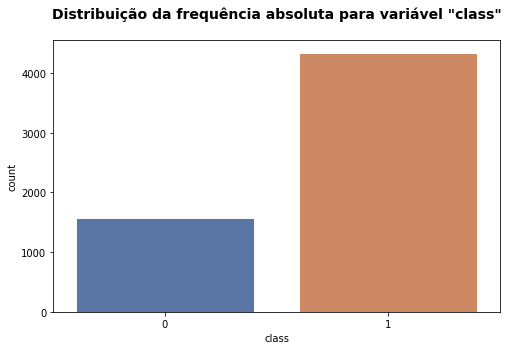

In [21]:
# plotando gráfico da distribuição das instâncias da variável 'class"
plt.figure(figsize=(8,5))
plt.title('Distribuição da frequência absoluta para variável "class"\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.set_theme(style='darkgrid')
ax = sns.countplot(x=data['class'], data=data)

**Selecionando os dados de treino e teste**

In [22]:
# separando os dados de treino e teste

# instanciando a base de treino - iremos utilizar uma amostra de 150 imagens
X_train = data[data['Dataset_type'] == 'TRAIN'].sample(200)

# instanciando a base de teste - iremos utilizar uma amostra de 60 imagens
X_test = data[data['Dataset_type'] == 'TEST'].sample(80)

In [23]:
# visualizando o tamanho das amostras - treino e teste
print(f'Base de treino [X_train]: {X_train.shape} | Base de teste [X_test]: {X_test.shape}')

Base de treino [X_train]: (200, 7) | Base de teste [X_test]: (80, 7)


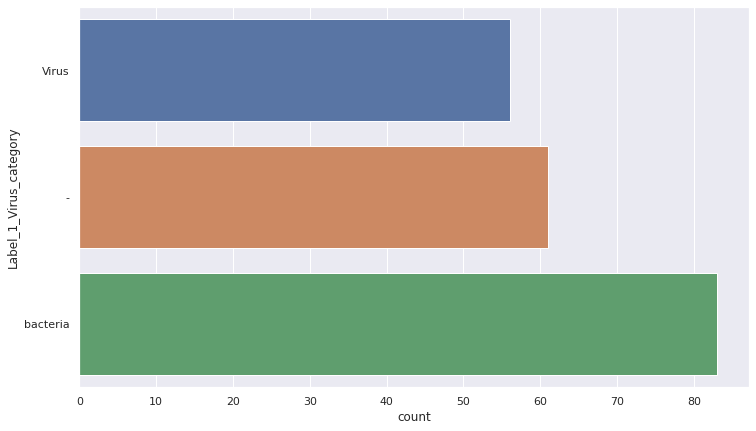

In [24]:
# plotando gráfico da divisão das classes
plt.figure(figsize=(12,7))
sns.countplot(y=X_train['Label_1_Virus_category']);

In [25]:
# acessando o google drive
from google.colab import drive
drive.mount('/content/arquivos_driver')

Drive already mounted at /content/arquivos_driver; to attempt to forcibly remount, call drive.mount("/content/arquivos_driver", force_remount=True).


In [26]:
# instanciando o caminho das imagens de treino e teste
train_images = '/content/arquivos_driver/MyDrive/Coronahack-Chest-XRay-Dataset/train'
test_images = '/content/arquivos_driver/MyDrive/Coronahack-Chest-XRay-Dataset/test'

Vamos utilizar a função ``os.walk`` para gerar os nomes dos arquivos em uma árvore de diretórios, percorendo a árvore de cima para baixo ou vice-versa.

Iremos passar como argumento na função uma lista e, selecionar apenas algumas imagens, a príncipio iremos capturar somente `10 imagens`.

In [27]:
# selecionando uma amostra das imagens
sample_images = list(os.walk(test_images))[0][2][:10]

# visualizando a descrição das amostras
sample_images

['IM-0033-0001-0002.jpeg',
 'IM-0007-0001.jpeg',
 'IM-0039-0001.jpeg',
 'IM-0009-0001.jpeg',
 'IM-0043-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0030-0001.jpeg',
 'IM-0015-0001.jpeg',
 'IM-0025-0001.jpeg',
 'IM-0033-0001.jpeg']

In [28]:
# agora vamos formatar o caminho das imagens 
# para isso, utilizaremos uma lista passando como argumento um "map" e uma função "lambda"
sample_images = list (map(lambda x: os.path.join(test_images, x), 
                          sample_images))

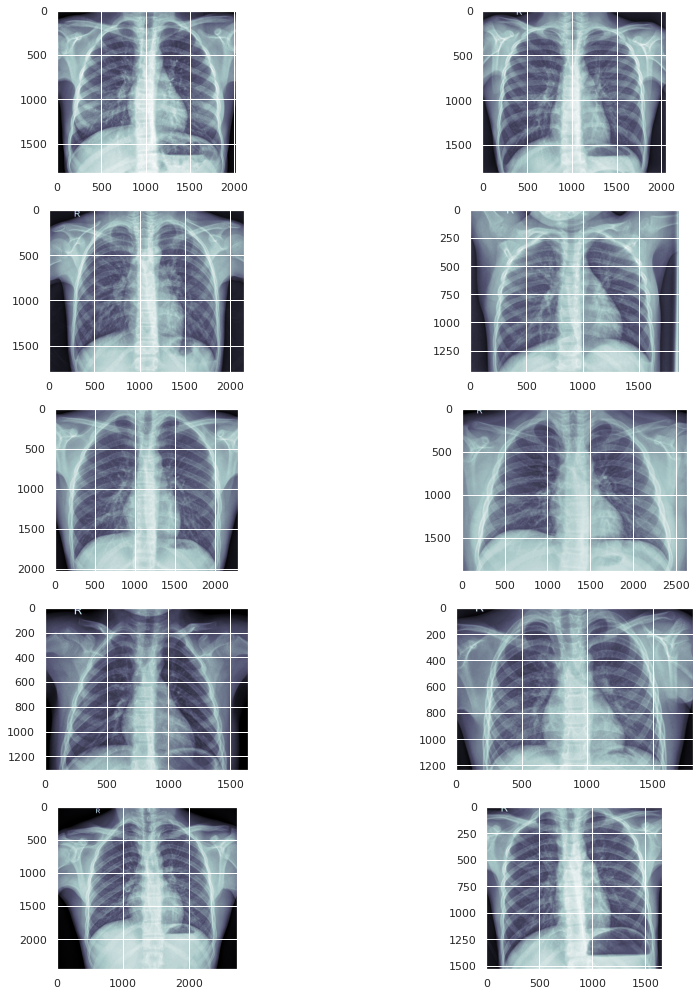

In [29]:
# plotando algumas imagens do conjunto de dados
plt.figure(figsize=(14,14)) # tamanho da imagem

# realizando um loop para plotar as imagens
for iterator, image_path in enumerate(sample_images):
    image = PIL.Image.open(image_path)  # carregando a imagem usando a lib PIL

    plt.subplot(5, 2, iterator + 1)     # definindo a grade dos gráficos
    plt.imshow(image, cmap=plt.cm.bone) # plotando a imagem dentro do gráfico

plt.tight_layout()  # função para ajustar a grade

**Verificando imagens ``com`` Covid**

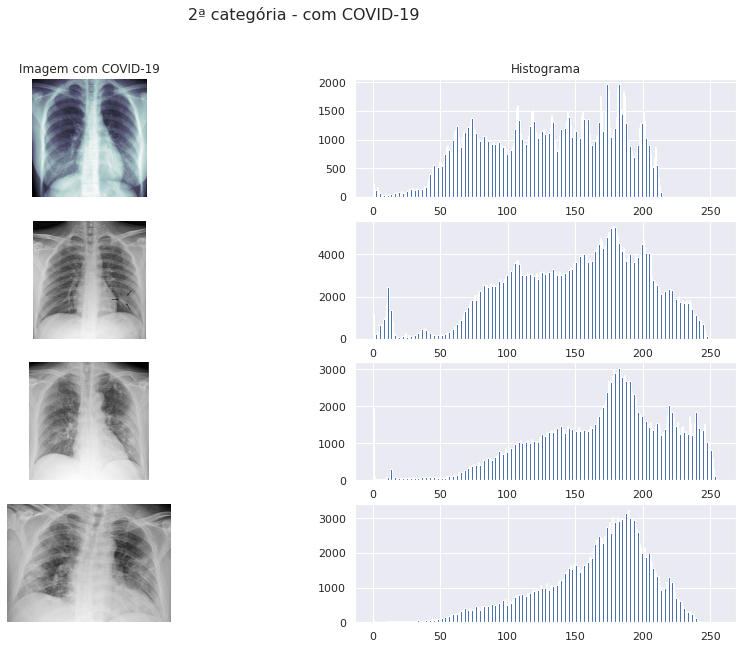

In [31]:
# extraindo informações das imagens com Covid

# definindo a estrutura da grade dos gráficos
fig, ax = plt.subplots(4, 2, figsize=(15, 10)) 

# filtrando apenas casos com Covid
# para isso, iremos pegar a coluna dos dados de raio-x
covid_cases = data[data['Label_2_Virus_category'] == 'COVID-19']['X_ray_image_name'].values

covid_case_samples = covid_cases[:4] # filtrando alguns casos

# ajustando o caminho para passar as imagens para a lib PIL
covid_case_samples = list(map(lambda x: os.path.join(train_images, x), 
                              covid_case_samples))

# loop para plotar as imagens e o gráfico
for line, path in enumerate(covid_case_samples):
  
    image = plt.imread(path)   # carregando a no gráfico
  
    ax[line, 0].imshow(image, cmap=plt.cm.bone) # plotando a imagem no gráfico

    # plotando o histograma da imagem
    # função "ravel" irar retornar uma lista com os valores total da imagem
    # ou seja, será extraido as escalas de cor da imagem
    ax[line, 1].hist(image.ravel(), 256, [0,256])

    # desligando as escalas de valores do gráfico da imagem
    ax[line, 0].axis('off')

    # condição para o primeiro loop
    # inserindo os títulos nas grade
    if line == 0:
        ax[line, 0].set_title('Imagem com COVID-19')
        ax[line, 1].set_title('Histograma')

# adicionando o título
fig.suptitle('2ª categória - com COVID-19', size=16);

**Verificando imagens ``sem`` Covid**

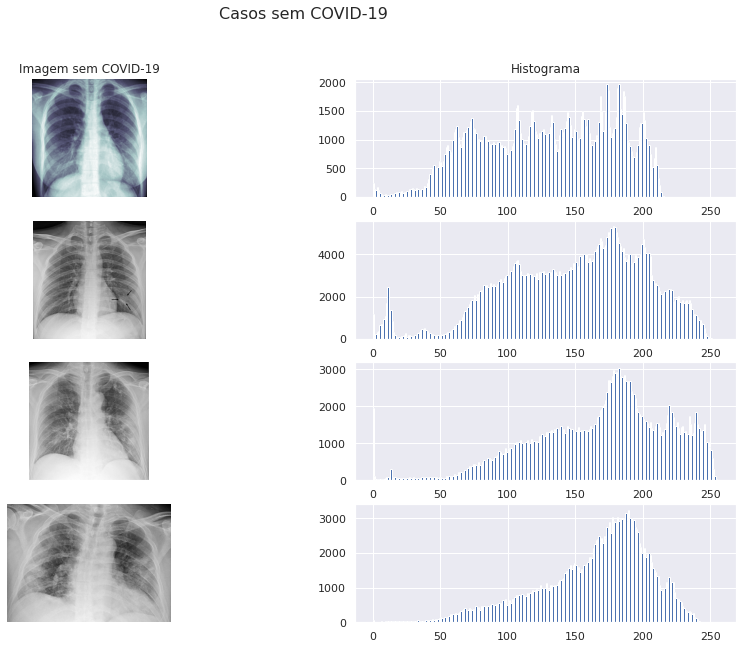

In [32]:
# extraindo informações das imagens sem Covid

# definindo a estrutura da grade dos gráficos
fig, ax = plt.subplots(4, 2, figsize=(15, 10))

# filtrando apenas os casos sem Covid
# para isso, iremos pegar a coluna dos dados de raio-x
no_covid = X_train[X_train['Label'] == 'Normal']['X_ray_image_name'].values 

no_covid_samples = no_covid[:4] # filtrando alguns casos

# ajustando o caminho para passar as imagens para a lib PIL
no_covid_samples = list(map(lambda x: os.path.join(train_images, x), 
                              no_covid_samples))

# loop para plotar as imagens e o gráfico
for line, path in enumerate(covid_case_samples):
  
    image = plt.imread(path)   # carregando a no gráfico
  
    ax[line, 0].imshow(image, cmap=plt.cm.bone) # plotando a imagem no gráfico

    # plotando o histograma da imagem
    # função "ravel" irar retornar uma lista com os valores tonal da imagem
    # ou seja, será extraido as escalas de cor da imagem
    ax[line, 1].hist(image.ravel(), 256, [0,256])

    # desligando as escalas de valores do gráfico da imagem
    ax[line, 0].axis('off')

    # condição para o primeiro loop
    # inserindo os títulos nas grade
    if line == 0:
        ax[line, 0].set_title('Imagem sem COVID-19')
        ax[line, 1].set_title('Histograma')

# adicionando o título
fig.suptitle('Casos sem COVID-19', size=16);

**Preparando os dados**

In [33]:
# criando uma função para ajustar a imagem

'''
    1º cisamento da imagem
    "Cisamento" significa que a imagem será distorcida ao longo de um eixo,
    principalmente para criar ou retificar os ângulos de percepção.
    Geralamente é usado para aumentar imagens para que os computadores,
    possam ver como os humanos veem as coisas de diferentes ângulos.   
    '''

func_pre_process_imagem = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2 # aumentar o zoom da imagem

)

# função para ler e converter a imagem em um array com as escalas de cores
def read_image(file, size, local): # arquivo, tamanho, local

    # carregando a imagem
    image = Image_.load_img(os.path.join(local, file), 
                            target_size=size)
  
    # convertendo a imagem em array
    image = img_to_array(image) / 255

    # retornano o resultado da imagem tratada
    return image

covid_zoom = []

# função para aumentar a imagem
def zoom_image(Nome):
    # carregando a imagem com a função "read_image"
    image = read_image(Nome, (255,255), train_images)

    # variável de iniciação para o loop
    loop = 0

    '''
    Loop para modificar as imagens.
    Vamos utilizar o "tqdm" para ver o processo.
    Chamando a função "func_pre_process_imagem".
    Chamando o método "flow" da função - vamos extrair os valores RGB da imagem.
    '''

    for batch in tqdm(func_pre_process_imagem.flow(tf.expand_dims(image, 0), 
                                                   batch_size=30)):
        # salvando os valores das escalas da imagem
        # retirando as dimensões do tensor com o "squeeze"
        covid_zoom.append(tf.squeeze(batch).numpy())

        # realizando um break no loop quando for 20
        if loop == 20:
            break
        loop = loop + 1

# aplicando a função
X_train['X_ray_image_name'].apply(zoom_image)

20it [00:00, 60.93it/s]
20it [00:00, 63.30it/s]
20it [00:00, 63.96it/s]
20it [00:00, 64.19it/s]
20it [00:00, 65.61it/s]
20it [00:00, 62.92it/s]
20it [00:00, 63.12it/s]
20it [00:00, 65.31it/s]
20it [00:00, 61.00it/s]
20it [00:00, 64.29it/s]
20it [00:00, 62.94it/s]
20it [00:00, 62.34it/s]
20it [00:00, 62.76it/s]
20it [00:00, 63.23it/s]
20it [00:00, 65.13it/s]
20it [00:00, 61.75it/s]
20it [00:00, 65.77it/s]
20it [00:00, 63.48it/s]
20it [00:00, 62.32it/s]
20it [00:00, 62.53it/s]
20it [00:00, 62.71it/s]
20it [00:00, 64.93it/s]
20it [00:00, 63.35it/s]
20it [00:00, 59.07it/s]
20it [00:00, 63.76it/s]
20it [00:00, 63.50it/s]
20it [00:00, 64.46it/s]
20it [00:00, 65.19it/s]
20it [00:00, 63.98it/s]
20it [00:00, 63.29it/s]
20it [00:00, 58.91it/s]
20it [00:00, 62.58it/s]
20it [00:00, 63.28it/s]
20it [00:00, 63.66it/s]
20it [00:00, 59.88it/s]
20it [00:00, 64.04it/s]
20it [00:00, 62.70it/s]
20it [00:00, 64.94it/s]
20it [00:00, 62.49it/s]
20it [00:00, 62.07it/s]
20it [00:00, 61.20it/s]
20it [00:00, 65.

3142    None
461     None
1984    None
5079    None
1152    None
        ... 
4891    None
1446    None
1840    None
541     None
1686    None
Name: X_ray_image_name, Length: 200, dtype: object

**Preparando os dados para o modelo**

In [34]:
# vamos extrair os dados de escalas das imagens
'''
Essa função poderá demorar para rodar!!!
'''
# parte do treino
train_list = [] # lista para salvar os valores

# aplicando a função para ler as imagens e extrair os dados  
X_train['X_ray_image_name'].apply(lambda x: train_list.append(read_image(x, 
                                                                         (255,255), 
                                                                         train_images)))

# parte do teste
test_list = []  # lista para salvar os valores

# aplicando a função para ler as imagens e extrair os dados  
X_test['X_ray_image_name'].apply(lambda x: test_list.append(read_image(x, 
                                                                       (255,255), 
                                                                       test_images)))

5773    None
5413    None
5319    None
5777    None
5512    None
        ... 
5422    None
5493    None
5675    None
5426    None
5368    None
Name: X_ray_image_name, Length: 80, dtype: object

In [35]:
# concatenando os rótulos de treinamento com os rótulos das imagens aumentada   
y_train = np.concatenate((
    np.int64(X_train['class'].values), 
    np.ones(len(covid_zoom), 
            dtype=np.int64)
))

**Dividindo os tensores**

In [36]:
# ajustando os dados para tensores
train_tensor = tf.convert_to_tensor(np.concatenate((np.array(train_list), np.array(covid_zoom))))
test_tensor = tf.convert_to_tensor(np.array(test_list))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(X_test['class'].values)

In [37]:
# verificando se todos os tensores estão na mesma dimensão
print(len(train_tensor))
print(len(test_tensor))
print(len(y_train_tensor))
print(len(y_test_tensor))

4400
80
4400
80


In [38]:
# definindo os dados de treino e teste
train_data = tf.data.Dataset.from_tensor_slices((train_tensor, y_train_tensor))
test_data = tf.data.Dataset.from_tensor_slices((test_tensor, y_test_tensor))

**Construindo o modelo**

In [39]:
# batchs para embalhalar os dados
qtdes_batchs = 4
buffer = 1000

batchs_train = train_data.shuffle(buffer).batch(qtdes_batchs)
batchs_test = test_data.batch(qtdes_batchs)

# definindo a dimensão das imagens
dim_images = (255,255,3)

# vamos utilizar um rede neural pré-treinada
model_base = tf.keras.applications.ResNet50(
    input_shape = dim_images, 
    include_top = False,
    weights = 'imagenet'
)

# definindo como falso para não bagunçar os pesos do modelo pré-treinado
model_base.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


**Criando a rede convolucional**

In [40]:
# definindo os ajustes da rede neural para treinar o modelo
model = Sequential()  # essa função é uma pilha linear de camadas

# atribuindo a rede pré-treinada
model.add(model_base)

'''
GlobalAveragePooling2D aplica o agrupamento médio nas dimensões espaciais
até que cada dimensão espacial seja uma e deixa as outras dimensões inalteradas.
'''
# adicionando a camada global
model.add(GlobalAveragePooling2D())

# adicionando as camadas na rede neural
model.add(Dense(128))

'''
Dropout é uma técnica em que neurônios selecionados aleatoriamente são ignorados durante o treinamento.
Eles são "descartados" aleatoriamente, isso significa que sua contribuição para a ativação dos
neurônios ausente é temporariamente removida na passagem para frente e quaisquer atualizações
de peso não são aplicadas ao neurônio na passagem para traś.
'''
# adicionando a técnica "Dropout"
model.add(Dropout(0.2))

# adicionando o tipo de ativação da rede neural
model.add(Dense(1, activation = 'sigmoid'))

# função para parar o treinamento caso a rede não esteja aprendendo mais nada
stop_rna = tf.keras.callbacks.EarlyStopping(monitor ='val_loss', 
                                            patience = 2)

# definindo outros parâmetros da rede
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [44]:
# treinando o modelo
'''
Esse processo é um tanto demorado!   
'''                                                                                                                                      
           
# função do modelo 
model.fit(batchs_train, # dados de treino 
          epochs = 10,  # definindo as épocas (ajustes dos passos)
          validation_data = batchs_test,  # dados de teste
          callbacks = [stop_rna]) # chamando a função de parada

Epoch 1/10
1100/1100 [==============================] - 974s 885ms/step - loss: 0.0729 - accuracy: 0.9859 - val_loss: 2.4626 - val_accuracy: 0.5750
Epoch 2/10
1100/1100 [==============================] - 970s 882ms/step - loss: 0.0657 - accuracy: 0.9861 - val_loss: 3.8289 - val_accuracy: 0.5750
Epoch 3/10
1100/1100 [==============================] - 965s 877ms/step - loss: 0.0706 - accuracy: 0.9868 - val_loss: 3.3825 - val_accuracy: 0.5750


**Verificando a acurácia do modelo**

In [45]:
# realizando as predições nas imagens de testes
pred = model.predict(np.array(test_list))

# ajustando a predição para ser entre 0 e 1
ajustes_num = np.argmax(pred, axis = 1)

# função para medir a acurácia do modelo
from sklearn.metrics import classification_report

# verificando a acurácia do modelo
print(classification_report(X_test['class'], 
                            ajustes_num.flatten()))

              precision    recall  f1-score   support

           0       0.42      1.00      0.60        34
           1       0.00      0.00      0.00        46

    accuracy                           0.42        80
   macro avg       0.21      0.50      0.30        80
weighted avg       0.18      0.42      0.25        80



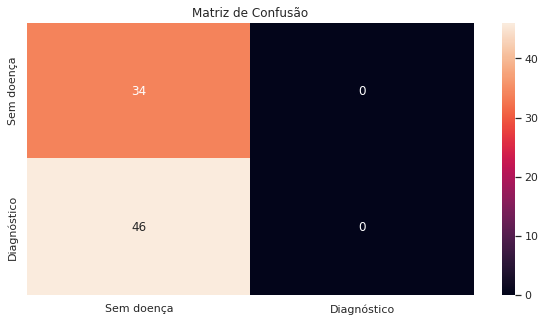

In [46]:
# função para medir a acurácia do modelo
from sklearn.metrics import confusion_matrix

# calculando a matriz
conf_mat = confusion_matrix(X_test['class'], 
                            ajustes_num.flatten())

# definindo o tamanho da figura
plt.figure(figsize = (10, 5))

# definindo um título
plt.title('Matriz de Confusão')

# plotando a matriz
sns.heatmap(conf_mat, 
            yticklabels = ['Sem doença', 'Diagnóstico'], 
            xticklabels = ['Sem doença', 'Diagnóstico'], 
            annot = True);

> A RNA apresentou performance aquém do mínimo aceitável!<br>

Poderiámos aumentar o números das amostras de treino e teste e, novamente avaliar a nossa rede.

Porém pra essa necessidade o ideal é rodar o modelo na máquina local. Já tentei rodar no ambiente do ``colab`` com a seguinte configuração - treino com 500 amostras e teste com 150, mas a rede caiu.